In [5]:
import pandas as pd
import numpy as np

# --- Configuration for Data Generation ---
num_unique_series = 1000  # Number of distinct time series
points_per_series = 365*5 # Number of data points for each series
start_date = '2023-01-01'
sampling_frequency = 'D' # Data frequency: 'H' for hourly, 'D' for daily, 'Min' for minute

# --- Generating the Long-Format DataFrame ---
all_series_data = []
cluster_assignments = {} # To ensure consistent cluster for each key

# Assign random clusters to each series beforehand
for i in range(num_unique_series):
    series_key = f'product_{i+1:03d}' # e.g., product_001, product_002
    cluster_id = np.random.randint(1, 4) # Assign to cluster 1, 2, or 3
    cluster_assignments[series_key] = cluster_id

for series_idx in range(num_unique_series):
    current_key = f'product_{series_idx+1:03d}'
    current_cluster = cluster_assignments[current_key]

    # Create a date range for the current series
    dates = pd.date_range(start=start_date, periods=points_per_series, freq=sampling_frequency)

    # Generate synthetic 'target' values
    # Let's simulate a basic trend + seasonality + noise for realism
    trend = np.linspace(0, 20, points_per_series)
    seasonality = 10 * np.sin(np.linspace(0, 4 * np.pi, points_per_series))
    noise = np.random.normal(0, 2, points_per_series)
    target_values = 100 + trend + seasonality + noise

    # Append data for each point in the series
    for date, value in zip(dates, target_values):
        all_series_data.append({
            'key': current_key,
            'dt_fecha': date,
            'target': value,
            'cluster': current_cluster
        })

# Convert the list of dictionaries into a Pandas DataFrame
df = pd.DataFrame(all_series_data)

# Ensure 'dt_fecha' is a proper datetime type (Pandas handles this usually during creation, but it's good practice to confirm)
df['dt_fecha'] = pd.to_datetime(df['dt_fecha'])

# --- Displaying the Simulated DataFrame ---
print("Simulated DataFrame for TimeSampler (first 10 rows):")
print(df.head(10))

print("\n--- DataFrame Information ---")
df.info()

print("\n--- Value Counts for 'key' (showing number of points per series) ---")
print(df['key'].value_counts().head())

print("\n--- Verification: Cluster ID for each 'key' (should be consistent) ---")
print(df.groupby('key')['cluster'].nunique()) # Should all be 1 if consistent

Simulated DataFrame for TimeSampler (first 10 rows):
           key   dt_fecha      target  cluster
0  product_001 2023-01-01   97.408782        1
1  product_001 2023-01-02   99.037242        1
2  product_001 2023-01-03  102.563251        1
3  product_001 2023-01-04   99.877238        1
4  product_001 2023-01-05  101.745948        1
5  product_001 2023-01-06  100.824917        1
6  product_001 2023-01-07   99.406439        1
7  product_001 2023-01-08  103.268786        1
8  product_001 2023-01-09   98.174118        1
9  product_001 2023-01-10   98.260746        1

--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825000 entries, 0 to 1824999
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   key       object        
 1   dt_fecha  datetime64[ns]
 2   target    float64       
 3   cluster   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 55.7+ MB

--- Value Counts for 'ke

C:\Users\Julian\AppData\Local\Temp\ipykernel_10272\571217796.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start=start_date, periods=points_per_series, freq=sampling_frequency)


DataFrame simulado (primeras 5 filas):
           key            dt_fecha      target  cluster
0  product_001 2023-01-01 00:00:00  102.072669        1
1  product_001 2023-01-01 01:00:00  104.719485        1
2  product_001 2023-01-01 02:00:00  102.515623        1
3  product_001 2023-01-01 03:00:00  102.627515        1
4  product_001 2023-01-01 04:00:00  103.025265        1


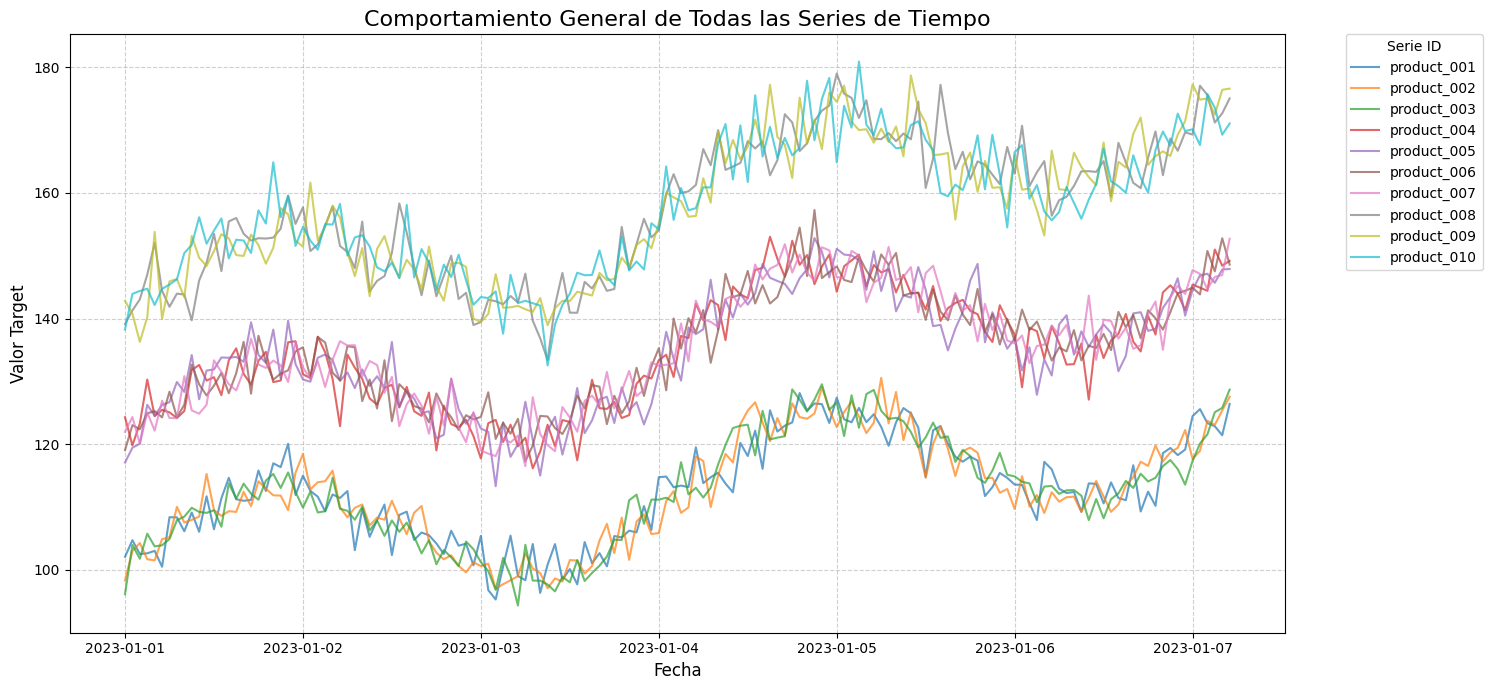

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Simular el DataFrame (el mismo que generamos antes) ---
num_unique_series = 10
points_per_series = 150
start_date = '2023-01-01'
sampling_frequency = 'H'

all_series_data = []
cluster_assignments = {}

for i in range(num_unique_series):
    series_key = f'product_{i+1:03d}'
    # Asignamos clusters de manera que algunos tengan más series que otros
    if i < 3: # 3 series en cluster 1
        cluster_id = 1
    elif i < 7: # 4 series en cluster 2
        cluster_id = 2
    else: # 3 series en cluster 3
        cluster_id = 3
    cluster_assignments[series_key] = cluster_id

for series_idx in range(num_unique_series):
    current_key = f'product_{series_idx+1:03d}'
    current_cluster = cluster_assignments[current_key]

    dates = pd.date_range(start=start_date, periods=points_per_series, freq=sampling_frequency)

    # Simulación de valores con más variación y alguna diferencia por cluster
    trend = np.linspace(0, 20 + current_cluster * 5, points_per_series) # Diferente tendencia por cluster
    seasonality = 10 * np.sin(np.linspace(0, 4 * np.pi, points_per_series))
    noise = np.random.normal(0, 2 + current_cluster * 0.5, points_per_series) # Más ruido en clusters más altos
    target_values = 100 + trend + seasonality + noise + (current_cluster - 1) * 20 # Offset por cluster

    for date, value in zip(dates, target_values):
        all_series_data.append({
            'key': current_key,
            'dt_fecha': date,
            'target': value,
            'cluster': current_cluster
        })

df = pd.DataFrame(all_series_data)
df['dt_fecha'] = pd.to_datetime(df['dt_fecha'])

print("DataFrame simulado (primeras 5 filas):")
print(df.head())


plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x='dt_fecha', y='target', hue='key', legend='full', palette='tab10', alpha=0.7)
plt.title('Comportamiento General de Todas las Series de Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor Target', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Serie ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

<Figure size 1800x800 with 0 Axes>

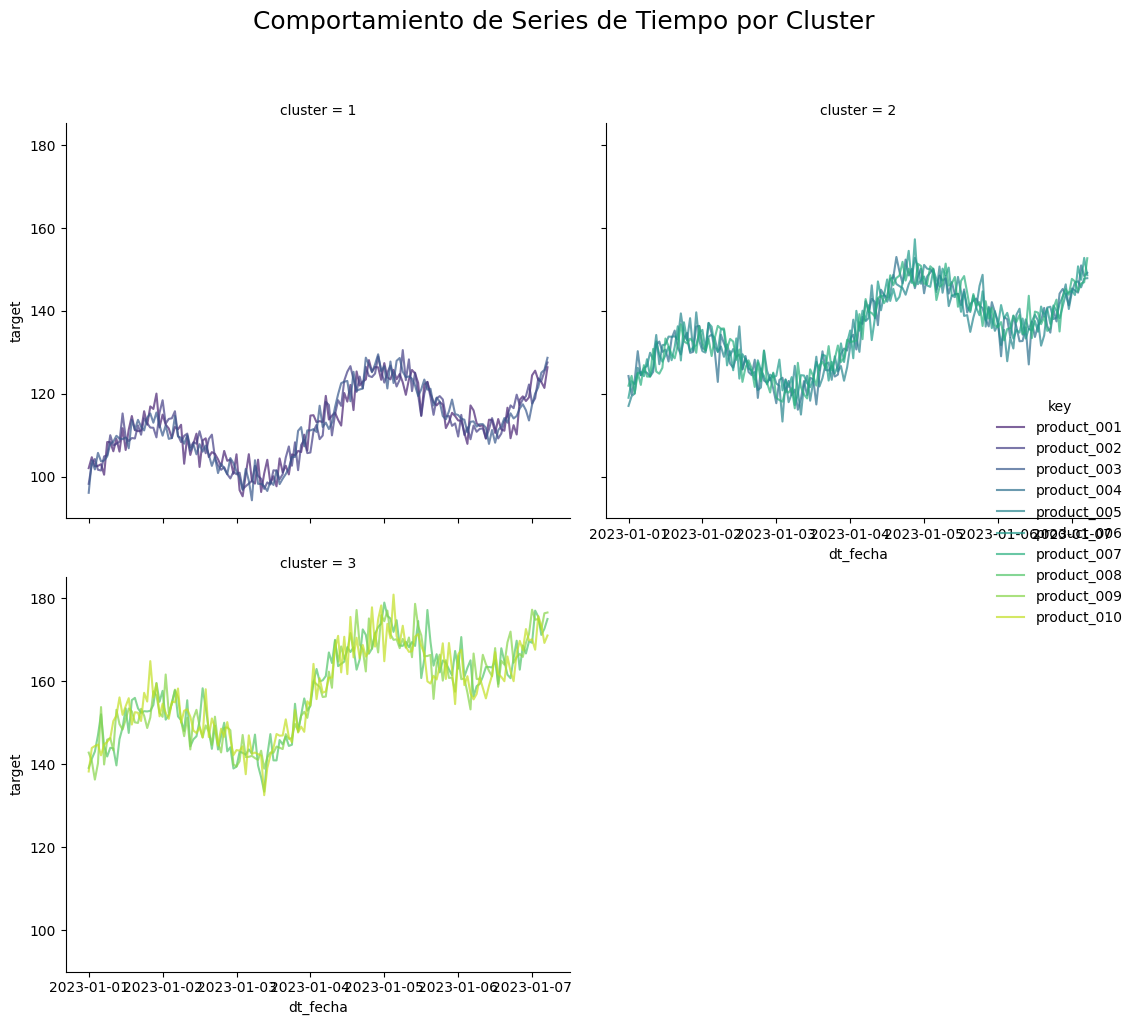

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))
sns.relplot(
    data=df,
    x='dt_fecha',
    y='target',
    hue='key',
    col='cluster',  # Facetas por cluster
    col_wrap=2,     # Ajusta el número de columnas de gráficos
    kind='line',    # Especifica que es un gráfico de líneas
    legend='full',
    palette='viridis',
    alpha=0.7
)
plt.suptitle('Comportamiento de Series de Tiempo por Cluster', y=1.02, fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Ajusta el layout para el título
plt.show()

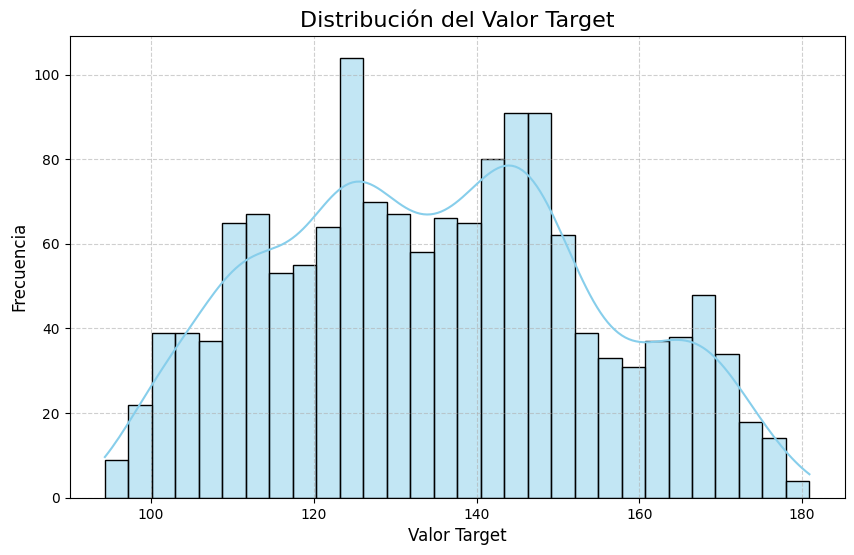

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], kde=True, bins=30, color='skyblue')
plt.title('Distribución del Valor Target', fontsize=16)
plt.xlabel('Valor Target', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\Julian\AppData\Local\Temp\ipykernel_10272\649488815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y='target', palette='Pastel1')


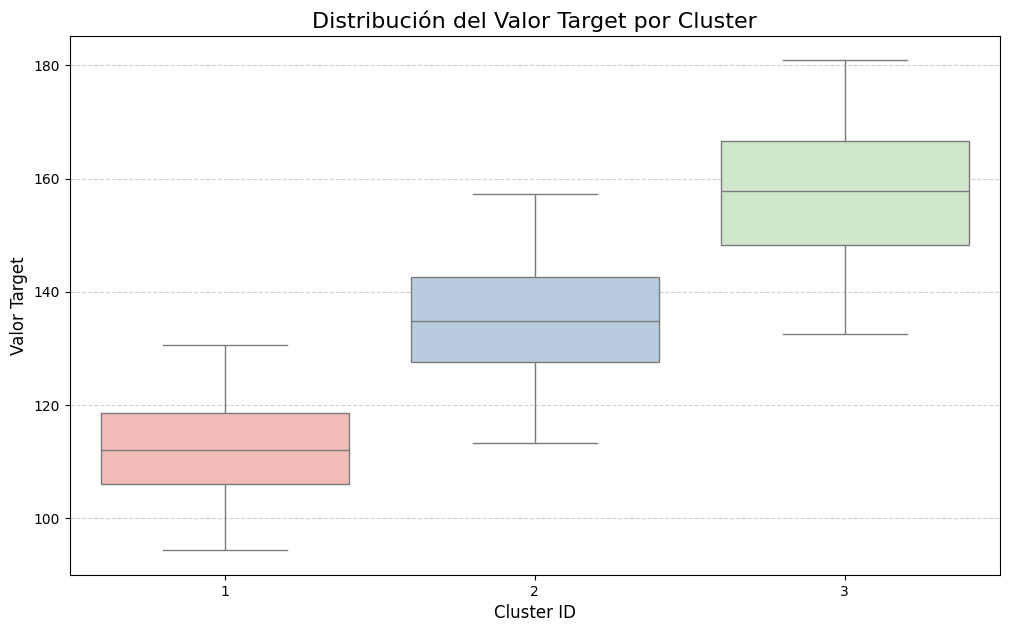

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='cluster', y='target', palette='Pastel1')
plt.title('Distribución del Valor Target por Cluster', fontsize=16)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Valor Target', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [17]:
import pandas as pd
from samplers_brothers import TimeSampler

# ``df`` must contain ``key``, ``dt_fecha``, ``target`` and ``cluster``.
# df = pd.read_csv("series_long_format.csv")

sampler = TimeSampler(df)
sample_k = sampler.sample(strategy="K", n_samples=500)
print(sample_k[:10])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [16]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ----------------------- ---------------- 6.3/10.7 MB 32.1 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 32.7 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 19.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ------- -------------------------------- 7.3/41.0 MB 34.9 MB/s eta 0:00:01
   ------------- -------------------------- 14.2/41.0 MB 34.2 MB/s eta 0:00:01
   --------------------- ------------------ 21.8/41.0 MB 34.4 MB/s eta 0:00:01
   ---------------------------- ----------- 29.6/41.0 MB 34.8 MB/s eta 0:00:01
   ------------------------------------ --- 37.2/41.0 MB 35.3 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.0 MB 35.1 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.0 MB 35.1 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.0 MB 35.1 MB/s eta 0